In [1]:
import matplotlib
%matplotlib inline
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

/Users/dwasserm/sources/NeuroLang/neurolang/expression_pattern_matching.py:55: UserWarning: Warning in class DatalogSolver overwrites {'universal_predicate', 'existential_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)


In [2]:
destrieux_dataset['labels']

rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
 (  2, b'L G_and_S_occipital_inf'), (  3, b'L G_and_S_paracentral'),
 (  4, b'L G_and_S_subcentral'), (  5, b'L G_and_S_transv_frontopol'),
 (  6, b'L G_and_S_cingul-Ant'), (  7, b'L G_and_S_cingul-Mid-Ant'),
 (  8, b'L G_and_S_cingul-Mid-Post'), (  9, b'L G_cingul-Post-dorsal'),
 ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
 ( 12, b'L G_front_inf-Opercular'), ( 13, b'L G_front_inf-Orbital'),
 ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
 ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
 ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
 ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
 ( 22, b'L G_oc-temp_med-Lingual'), ( 23, b'L G_oc-temp_med-Parahip'),
 ( 24, b'L G_orbital'), ( 25, b'L G_pariet_inf-Angular'),
 ( 26, b'L G_pariet_inf-Supramar'), ( 27, b'L G_parietal_sup'),
 ( 28, b'L G_postcentral'), ( 29, b'L G_precentral'),
 ( 30, b'L G_precuneus'),

In [3]:
nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if not name.startswith('L ') or ('S_' not in name and 'Lat_Fis' not in name and 'Pole' not in name):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name)

# Temporal lobe


## Lateral surface


## Superior temporal sulcus

Looking for the Superior Temporal Sulcus
Found
4 other sulci also found:


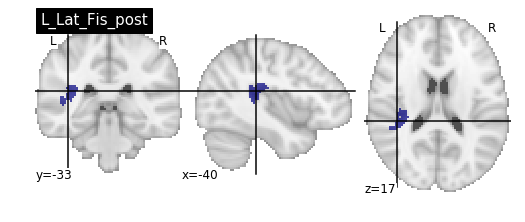

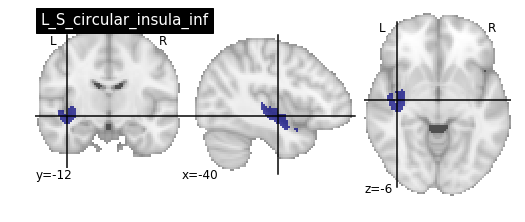

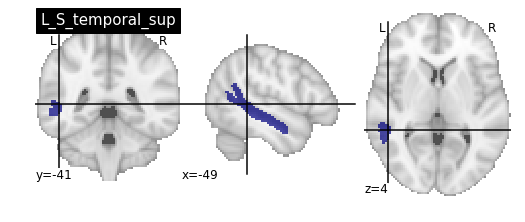

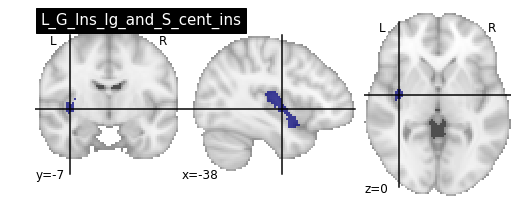

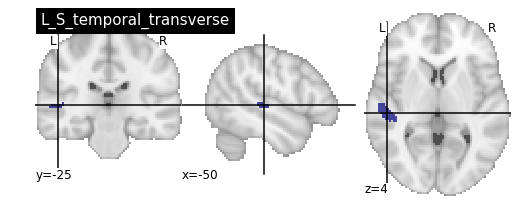

In [4]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
print("Looking for the Superior Temporal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_temporal_sup'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)
        
if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Inferior temporal sulcus

Looking for the Inferior Temporal Sulcus
Found
3 other sulci also found:


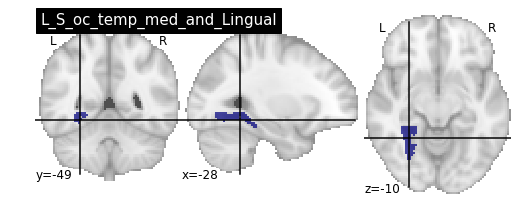

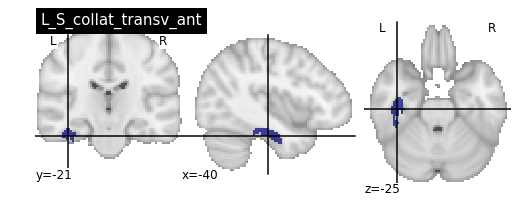

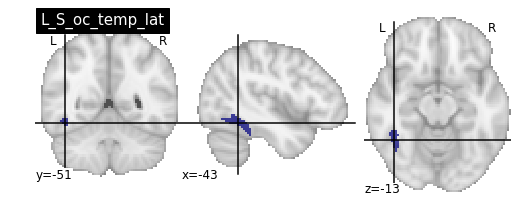

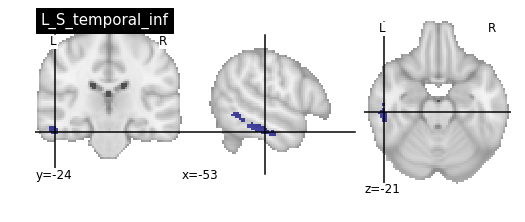

In [5]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
print("Looking for the Inferior Temporal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_temporal_inf'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)
        
if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Temporal Transverse sulcus

Looking for the Transverse Temporal Sulcus
Found alone


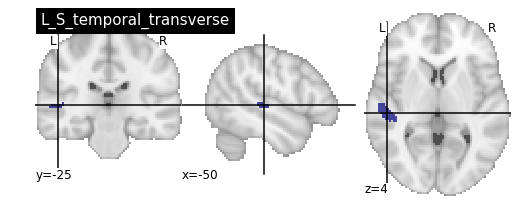

In [6]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
print("Looking for the Transverse Temporal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_temporal_transverse'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)
        
if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Lateral Occipitotemporal sulcus
2 ways.

Looking for the Occipitotemporal Sulcus
Found alone


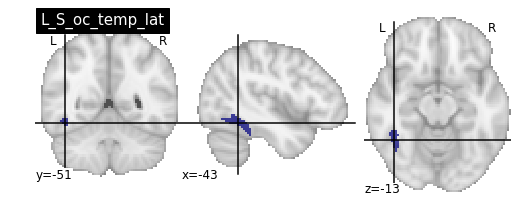

In [7]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Occipitotemporal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_oc_temp_lat'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)
        
if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Occipitotemporal Sulcus
Found alone


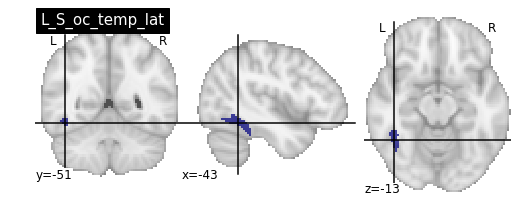

In [8]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_orbital_H_Shaped)
    )
)
res = q.do()
print("Looking for the Occipitotemporal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_oc_temp_lat'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)
        
if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Collateral sulcus: anterior part

Looking for the Collateral Sulcus (anterior part)
Found alone


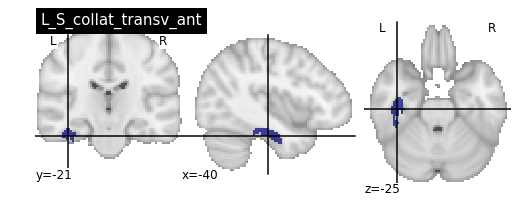

In [9]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Collateral Sulcus (anterior part)")
found_sulcus=[]
target_sulcus = 'L_S_collat_transv_ant'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Temporal pole

Looking for the Temporal Pole
Found alone


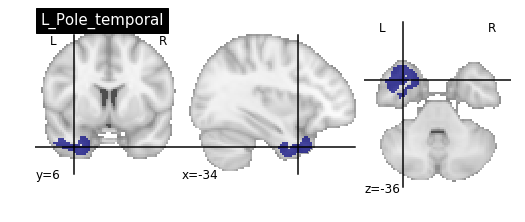

In [10]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Temporal Pole")
found_sulcus=[]
target_sulcus = 'L_Pole_temporal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Lateral orbital sulcus

Looking for the Lateral Orbital Sulcus
Found
2 other sulci also found:


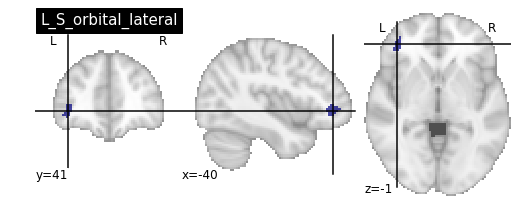

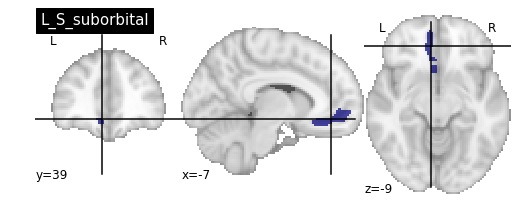

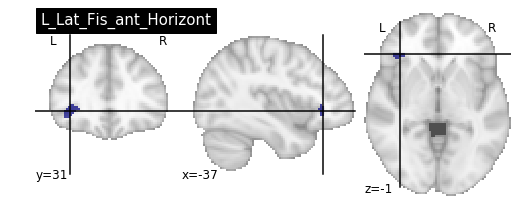

In [11]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_inf_part) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_front_middle) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped)
    )
)
res = q.do()
print("Looking for the Lateral Orbital Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_orbital_lateral'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Ventral surface

## Collateral sulcus (posterior)

Found


Looking for the Collateral Sulcus (posterior part)
Found alone


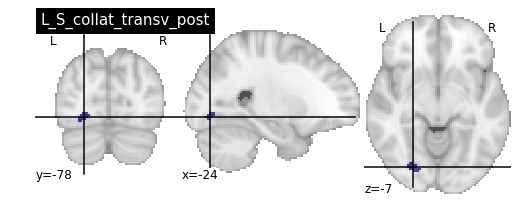

In [12]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
print("Looking for the Collateral Sulcus (posterior part)")
found_sulcus=[]
target_sulcus = 'L_S_collat_transv_post'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

# Occipital lobe sulci

## Occipitotemporal (medial) and lingual sulci


Looking for the Medial Occipitotemporal and Lingual Sulcus
Found alone


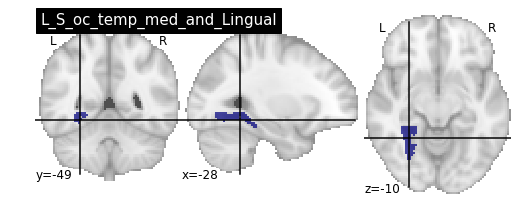

In [13]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_temporal_inf) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_oc_sup_and_transversal)
    )
)
res = q.do()
print("Looking for the Medial Occipitotemporal and Lingual Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_oc_temp_med_and_Lingual'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Occipital anterior sulcus

Success.


Looking for the Anterior Occipital Sulcus
Found alone


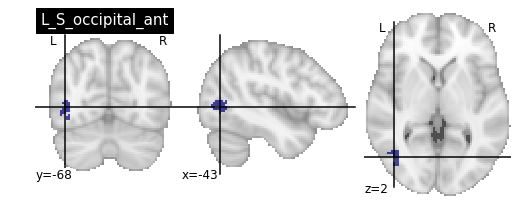

In [14]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_post)
    )
)
res = q.do()
print("Looking for the Anterior Occipital Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_occipital_ant'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Occipital superior and transversal sulci

Looking for the Superior Occipital and Transversal sulci
Found alone


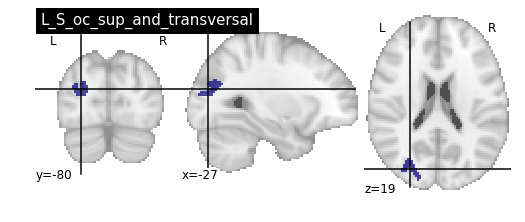

In [15]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_subparietal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine)
    )
)
res = q.do()
print("Looking for the Superior Occipital and Transversal sulci")
found_sulcus=[]
target_sulcus = 'L_S_oc_sup_and_transversal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Occipital middle and Lunate sulcus

Looking for the Middle Occipital and Lunate Sulcus
Found alone


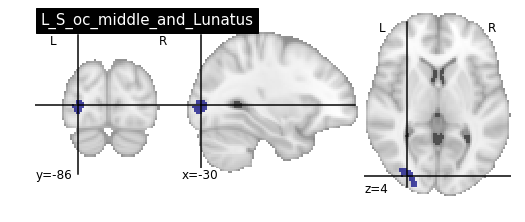

In [16]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_occipital_ant) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_post)
    )
)
res = q.do()
print("Looking for the Middle Occipital and Lunate Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_oc_middle_and_Lunatus'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Inferior occipital gyrus and sulcus

Looking for the Inferior Occipital Gyrus and Sulcus
Found alone


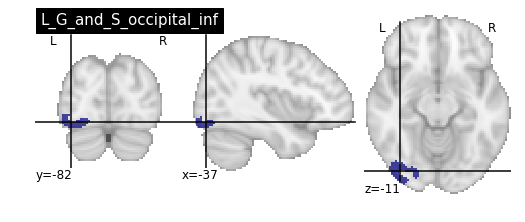

In [17]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_oc_sup_and_transversal) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
print("Looking for the Inferior Occipital Gyrus and Sulcus")
found_sulcus=[]
target_sulcus = 'L_G_and_S_occipital_inf'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Occipital Pole

Looking for the Occipital Pole
Found alone


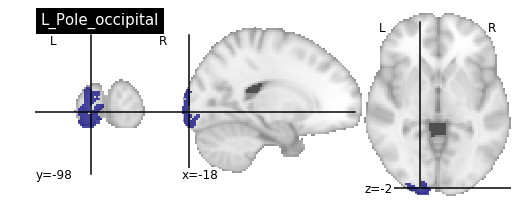

In [18]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_collat_transv_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
print("Looking for the Occipital Pole")
found_sulcus=[]
target_sulcus = 'L_Pole_occipital'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

# Parietal lobe sulci

## Lateral Surface


## Intermediate Primus of Jensen


Looking for the Intermediate Primus of Jensen
Found alone


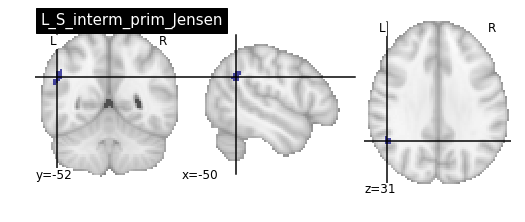

In [19]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
print("Looking for the Intermediate Primus of Jensen")
found_sulcus=[]
target_sulcus = 'L_S_interm_prim_Jensen'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Intraparietal sulcus

Looking for the Intraparietal Sulcus
Found
1 other sulcus also found:


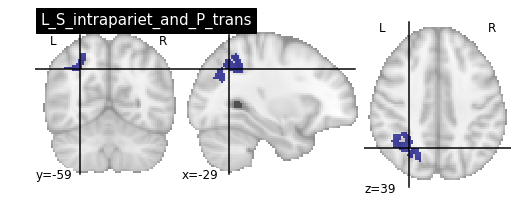

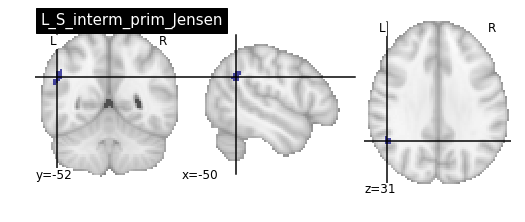

In [20]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
print("Looking for the Intraparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_intrapariet_and_P_trans'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Postcentral sulcus

Looking for the Postcentral Sulcus
Found
1 other sulcus also found:


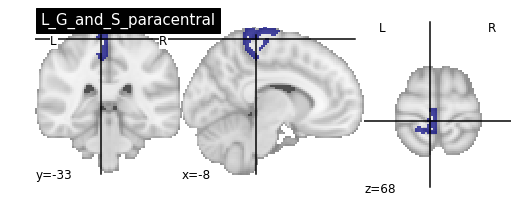

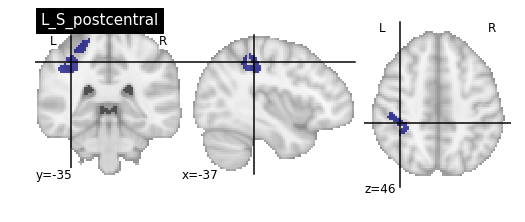

In [21]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_subparietal) 
    )
)
res = q.do()
print("Looking for the Postcentral Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_postcentral'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Medial surface

## Subparietal sulcus

6 ways.

Looking for the Subparietal Sulcus
Found alone


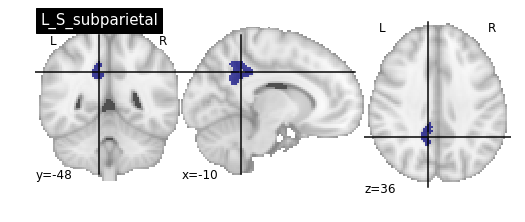

In [22]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Subparietal Sulcus
Found alone


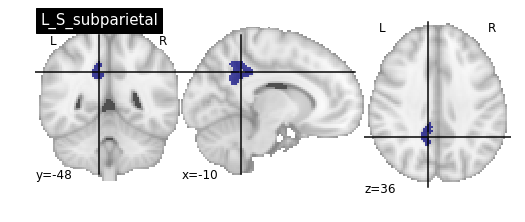

In [23]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Subparietal Sulcus
Found alone


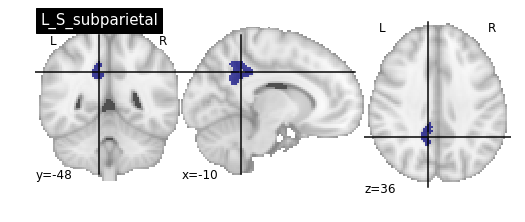

In [24]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Subparietal Sulcus
Found alone


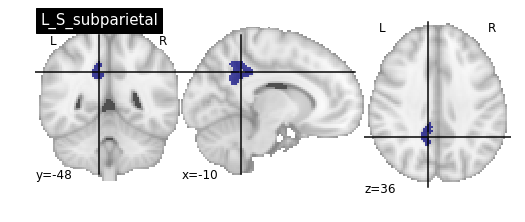

In [25]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Subparietal Sulcus
Found alone


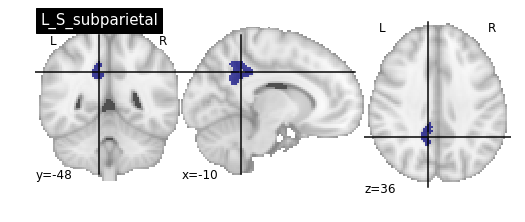

In [26]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Subparietal Sulcus
Found alone


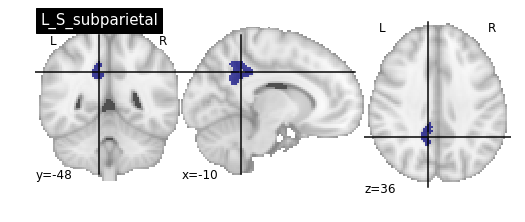

In [27]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_postcentral) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_interm_prim_Jensen)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_subparietal'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Marginal sulcus
2 ways.

Looking for the Marginal Sulcus
Found
2 other sulci also found:


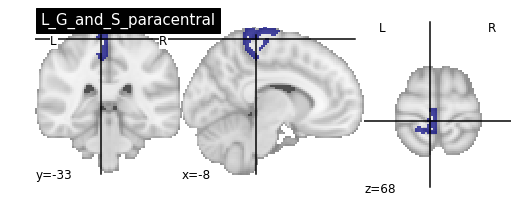

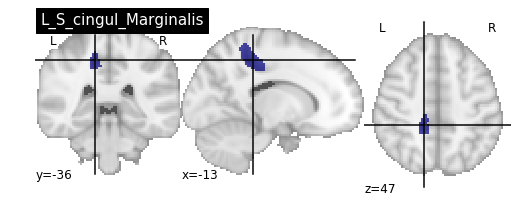

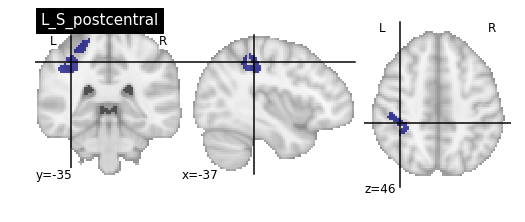

In [28]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
print("Looking for the Marginal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_cingul_Marginalis'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

Looking for the Marginal Sulcus
Found
2 other sulci also found:


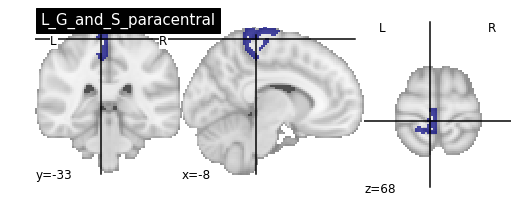

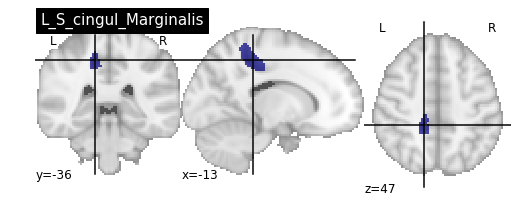

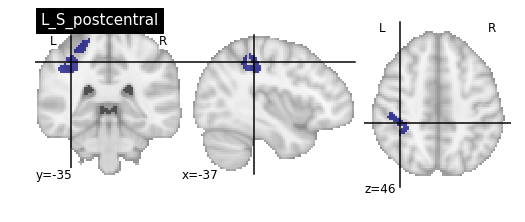

In [29]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_interm_prim_Jensen) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Ant)
    )
)
res = q.do()
print("Looking for the Marginal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_cingul_Marginalis'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

# Frontal lobe sulci

## Ventral surface

--> We cannot narrow these down each specifically because we cannot differentiate between lateral/medial sulci yet


## Orbital H-shaped sulcus



Looking for the Orbital H-Shaped Sulcus
Found alone


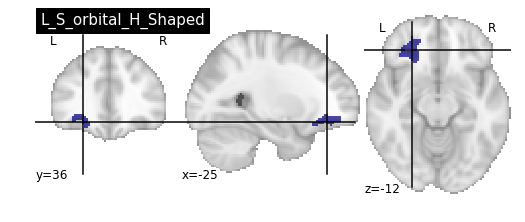

In [30]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_suborbital)
    )
)
res = q.do()
print("Looking for the Orbital H-Shaped Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_orbital_H_Shaped'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Olfactory sulcus



Looking for the Olfactory Sulcus
Found alone


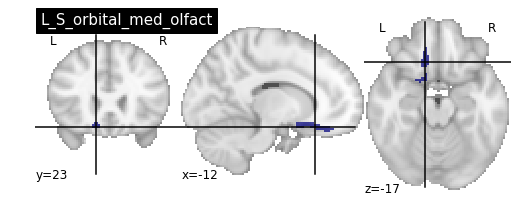

In [31]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_inf_part) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_circular_insula_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_G_and_S_frontomargin)
    )
)
res = q.do()
print("Looking for the Olfactory Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_orbital_med_olfact'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Looking for suborbital sulcus

Looking for the Suborbital Sulcus
Found alone


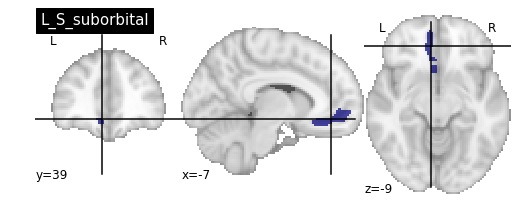

In [32]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_orbital_H_Shaped) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Suborbital Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_suborbital'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Lateral surface

## Looking for precentral superior and inferior parts

Looking for the Precentral Sulci: superior and inferior parts
Found alone


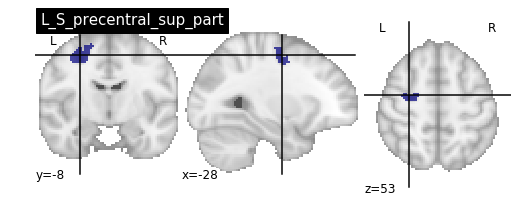

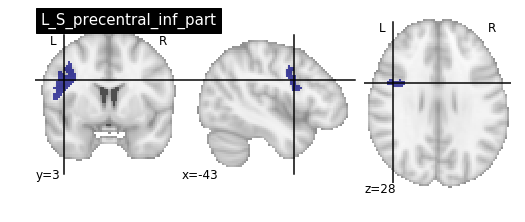

In [33]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal)
    )
)
res = q.do()
print("Looking for the Precentral Sulci: superior and inferior parts")
found_sulcus=[]
target_sulcus = 'L_S_precentral_sup_part' or 'L_S_precentral_inf_part'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==2:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==3:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Inferior frontal sulcus

Looking for the Inferior Frontal Sulcus
Found
2 other sulci also found:


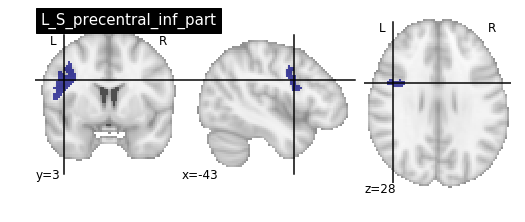

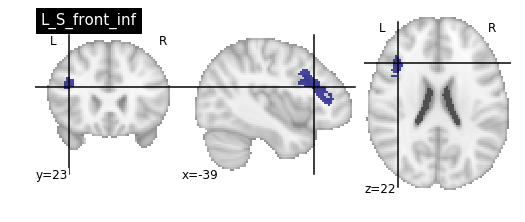

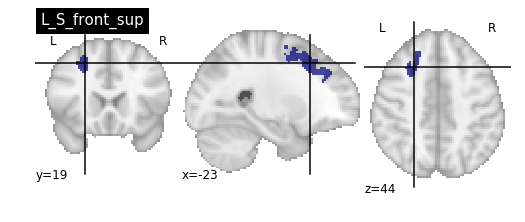

In [34]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal)
    )
)
res = q.do()
print("Looking for the Inferior Frontal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_front_inf'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Middle frontal sulcus

Looking for the Middle Frontal Sulcus
Found alone


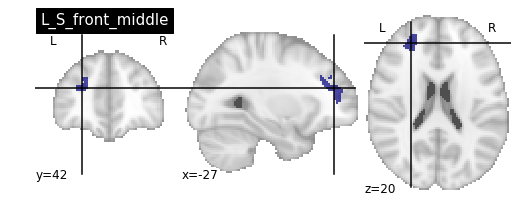

In [35]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_precentral_sup_part) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_G_and_S_cingul_Mid_Ant)
    )
)
res = q.do()
print("Looking for the Middle Frontal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_front_middle'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Precentral sulcus (superior part)

Looking for the Precentral Sulcus (superior part)
Found
1 other sulcus also found:


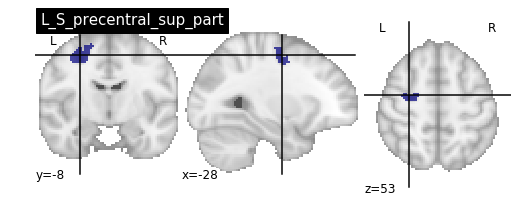

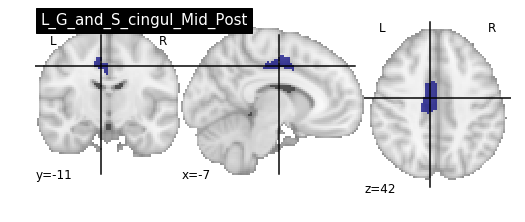

In [36]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_postcentral) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_front_inf) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical)
    )
)
res = q.do()
print("Looking for the Precentral Sulcus (superior part)")
found_sulcus=[]
target_sulcus = 'L_S_precentral_sup_part'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Precentral sulcus (inferior part)

Looking for the Precentral Sulcus (inferior part)
Found alone


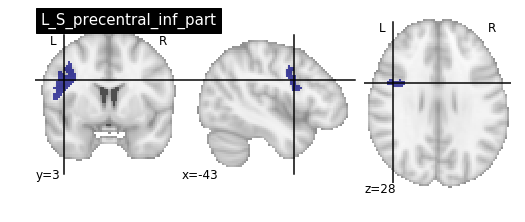

In [37]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_front_sup)
    )
)
res = q.do()
print("Looking for the Precentral Sulcus (inferior part)")
found_sulcus=[]
target_sulcus = 'L_S_precentral_inf_part'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

## Superior frontal sulcus

Looking for the Superior Frontal Sulcus
Found alone


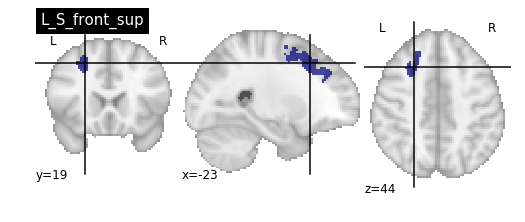

In [38]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_interm_prim_Jensen)
    )
)
res = q.do()
print("Looking for the Superior Frontal Sulcus")
found_sulcus=[]
target_sulcus = 'L_S_front_sup'
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)
    if target_sulcus in r.symbol_name:
        found_sulcus.append(target_sulcus)

if target_sulcus in found_sulcus and len(res)==1:
    print ("Found alone")
elif target_sulcus in found_sulcus and len(res)==2:
    print("Found")
    print("1 other sulcus also found:")
elif target_sulcus in found_sulcus and len(res)!=1:
    print("Found")
    print(str(len(res)-1)+" other sulci also found:")
else:
    print("Not found")

{x | anatomical_anterior_of(x, l_s_central)}
{x | ( anatomical_anterior_of(x, l_s_central) ) and_ ( anatomical_superior_of(x, l_s_temporal_sup) )}


/Users/dwasserm/anaconda/envs/root3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


{x | ( anatomical_anterior_of(x, l_s_central) ) and_ ( invert(∃y: ( anatomical_anterior_of(y, l_s_central) ) and_ ( anatomical_anterior_of(x, y) )) )}
temporal_lobe: typing.AbstractSet[neurolang.regions.Region] = ['l_s_circular_insula_inf', 'l_g_ins_lg_and_s_cent_ins']


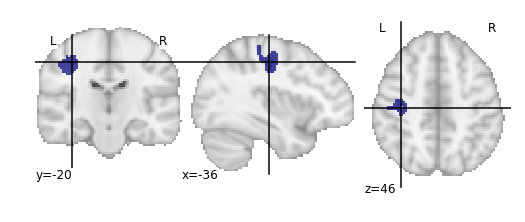

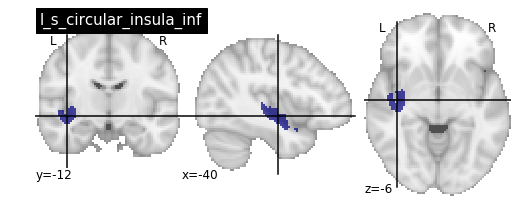

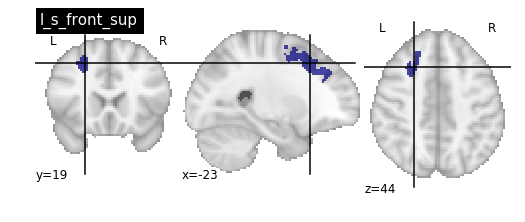

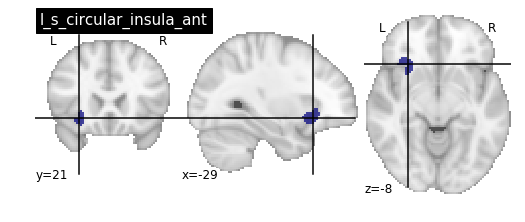

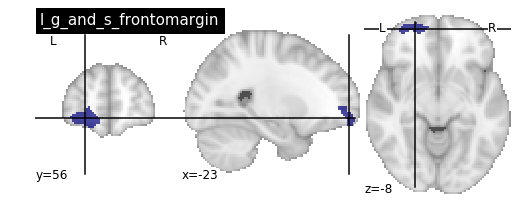

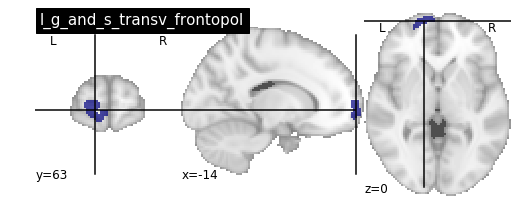

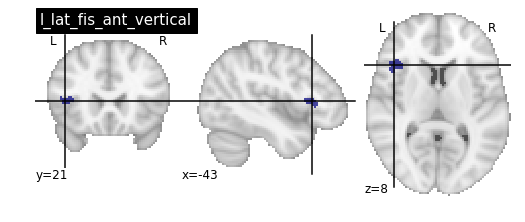

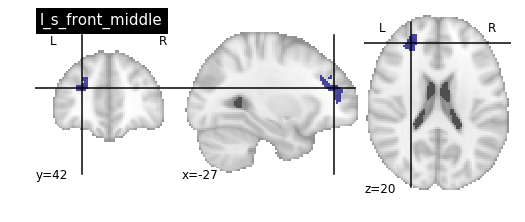

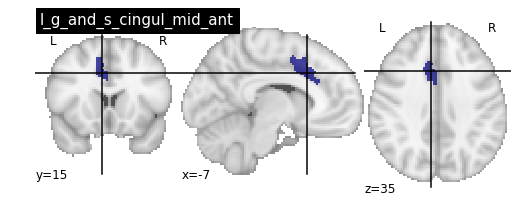

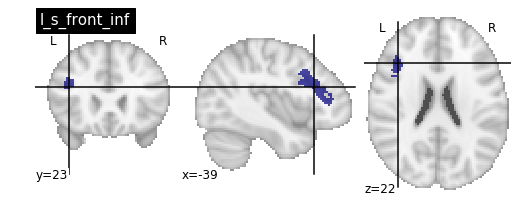

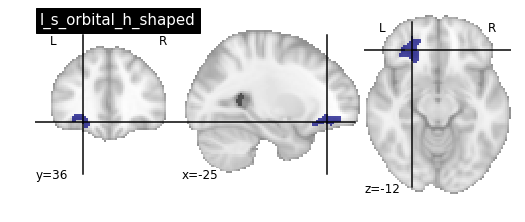

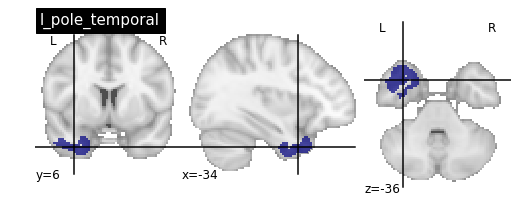

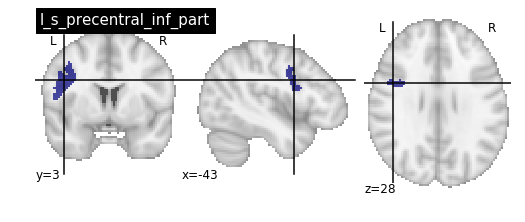

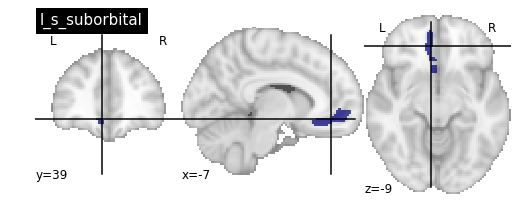

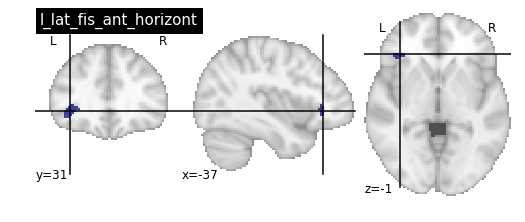

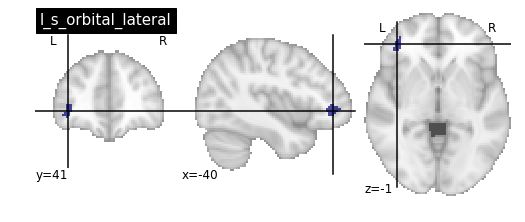

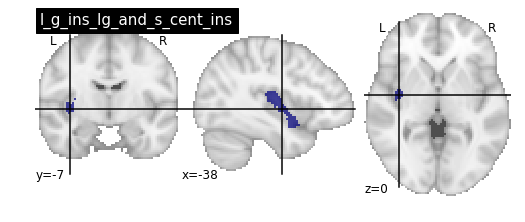

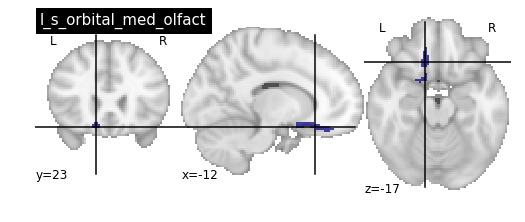

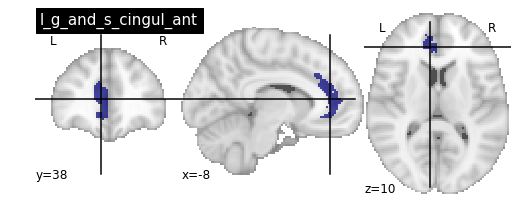

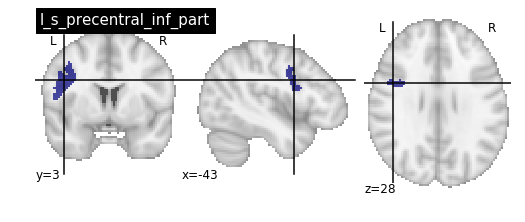

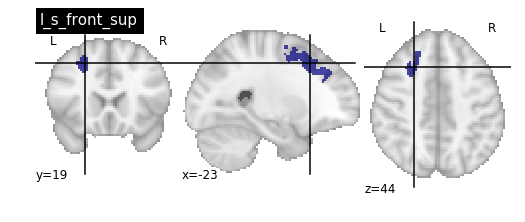

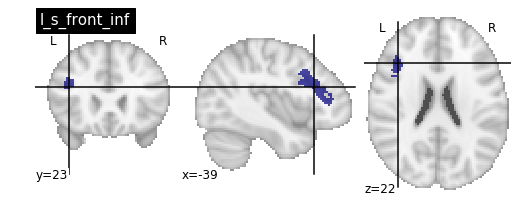

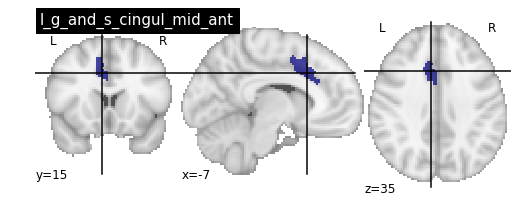

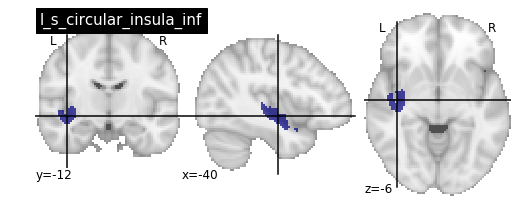

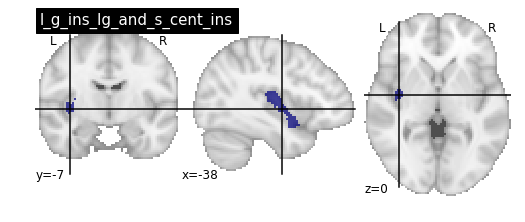

In [39]:
# -*- coding: utf-8 -*-
r'''
NeuroLang Query Example based on the Destrieux Atlas
====================================================


Uploading the Destrieux left sulci into NeuroLang and
executing some simple queries.
'''
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

###############################################################################
# Load the Destrieux example from nilearn
# ---------------------------------------

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

###############################################################################
# Input the left sulci into the NeuroLang interface
# -------------------------------------------------

nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if (
        not name.startswith('L ') or
        not ('S_' in name or 'Lat_Fis' in name or 'Pole' in name)
    ):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name.lower())

##################################################
# Plot one of the symbols

plotting.plot_roi(nl.symbols.l_s_central.value.spatial_image())


###############################################################################
# Create and run a simple query
# -----------------------------

x = nl.new_region_symbol('x')
q = nl.query(x, nl.symbols.anatomical_anterior_of(x, nl.symbols.l_s_central))
print(q)

##################################################
#

res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)


###############################################################################
# Create and run query which is a bit more complex
# ------------------------------------------------
x = nl.new_region_symbol('x')
q = nl.query(
    x,
    nl.symbols.anatomical_anterior_of(x, nl.symbols.l_s_central) &
    nl.symbols.anatomical_superior_of(x, nl.symbols.l_s_temporal_sup)
)
print(q)

##################################################
#

res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)


###############################################################################
# Create and run query with existential quantifiers and negation
# --------------------------------------------------------------
x = nl.new_region_symbol('x')
y = nl.new_region_symbol('y')
q = nl.query(
    x,
    nl.symbols.anatomical_anterior_of(x, nl.symbols.l_s_central) &
    ~nl.exists(
        y,
        nl.symbols.anatomical_anterior_of(y, nl.symbols.l_s_central) &
        nl.symbols.anatomical_anterior_of(x, y)
    )
)
print(q)

##################################################
#

res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)


###############################################################################
# Use the set of results from a query in a different one
# ------------------------------------------------------
x = nl.new_region_symbol('x')
temporal_lobe_query = nl.query(
    x,
    nl.symbols.anatomical_inferior_of(x, nl.symbols.l_s_parieto_occipital) &
    nl.symbols.anatomical_anterior_of(x, nl.symbols.l_s_calcarine) &
    nl.symbols.anatomical_posterior_of(x, nl.symbols.l_lat_fis_ant_vertical)
)
temporal_lobe = q.do(result_symbol_name='temporal_lobe')
print(temporal_lobe)

##################################################
#

In [40]:
q = nl.query(
    x,
    nl.symbols.temporal(x) &
    ~nl.symbols.anatomical_inferior_of(x, nl.symbols.l_s_temporal_inf)
)

print(q)

##################################################
#

res = q.do()
for r in res:
    plotting.plot_roi(r.value.spatial_image(), title=r.symbol_name)

AttributeError: 